In [15]:
import numpy as np
import pandas as pd
import math as m

In [16]:
pub_death_df = pd.read_csv('C:\PUBG DATA\kill_match_stats_final_0.csv')
pub_death_df = pub_death_df.dropna()
killed_by = pub_death_df['killed_by'].tolist()
pub_map = pub_death_df['map'].tolist()
killer_position_x = pub_death_df['killer_position_x'].tolist()
killer_position_y = pub_death_df['killer_position_y'].tolist()
victim_position_x = pub_death_df['victim_position_x'].tolist()
victim_position_y = pub_death_df['killer_position_y'].tolist()

In [17]:
#figure out the average kill range in meters for each death both maps are 8km / 8km and x - y coordinates range from 0 - 800000
def distance_calculator(killer_x,killer_y,victim_x,victim_y):
    return m.sqrt((killer_x - victim_x)**2 + (killer_y - victim_y)**2) * .01 #the .01 is converting x,y coordinate difference into meters
distance_of_kill_in_meters = []
for index in range(len(killer_position_x)):
    distance_of_kill_in_meters.append(distance_calculator(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))
 
print('The average distance of a kill on both maps : {}' .format(np.mean(distance_of_kill_in_meters)))

The average distance of a kill on both maps : 139.51353765062836


In [18]:
#now lets check if this holds true for both the maps
distance_of_kill_in_meters_erangel = []
distance_of_kill_in_meters_miramar = []

for index in range(len(killer_position_x)):
    if pub_map[index] == 'ERANGEL':
        distance_of_kill_in_meters_erangel.append(distance_calculator(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))
    else:
        distance_of_kill_in_meters_miramar.append(distance_calculator(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))

print('The average distance of a kill on Erangel : {}' .format(np.mean(distance_of_kill_in_meters_erangel)))
print('The average distance of a kill on Miramar : {}' .format(np.mean(distance_of_kill_in_meters_miramar)))

The average distance of a kill on Erangel : 141.3505695541631
The average distance of a kill on Miramar : 131.11430721222413


In [19]:
#check if this change in mean is statistically significant

In [20]:
print(len(distance_of_kill_in_meters_erangel))
print(len(distance_of_kill_in_meters_miramar))

9928829
2171577


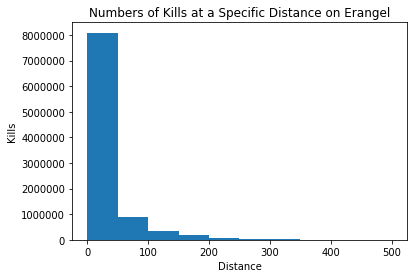

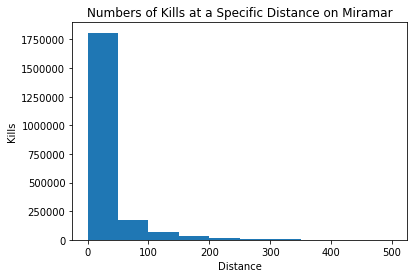

BartlettResult(statistic=9341.4190240814496, pvalue=0.0)


In [21]:
#some basic visualization and checking loosly if normally distributed
import matplotlib.pyplot as plt
from scipy import stats
plt.hist(distance_of_kill_in_meters_erangel, range = (0,500))
plt.title("Numbers of Kills at a Specific Distance on Erangel")
plt.xlabel("Distance")
plt.ylabel("Kills")
plt.show()

plt.hist(distance_of_kill_in_meters_miramar, range = (0,500))
plt.title("Numbers of Kills at a Specific Distance on Miramar")
plt.xlabel("Distance")
plt.ylabel("Kills")
plt.show()

print(scipy.stats.bartlett(distance_of_kill_in_meters_erangel,distance_of_kill_in_meters_miramar))

In [22]:
#the final result
scipy.stats.ttest_ind(distance_of_kill_in_meters_erangel,distance_of_kill_in_meters_miramar,equal_var = False)
#we can conclude that the distance of average kill ranges across the maps is statistically different

Ttest_indResult(statistic=19.543169316245351, pvalue=4.7686080851925697e-85)

In [23]:
#this analysis is great and all, but what about the hackers? The max render distance of players on pubg is 1km. Therefore,
#we can see how kills > 1km are considered to be a hacked kill

The average distance of a kill on both maps : 27.52550263912418
The average distance of a kill on Erangel without hackers: 27.837347602965085
The average distance of a kill on Miramar without hackers: 26.10129790279316


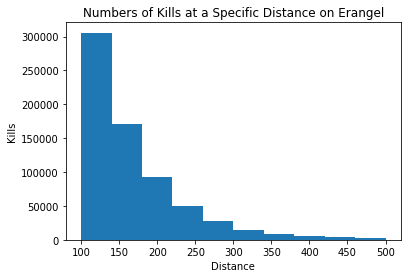

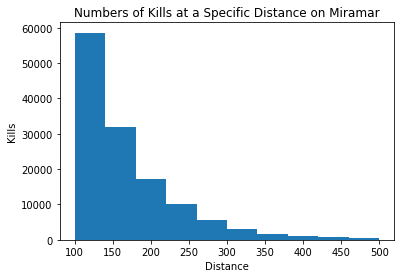

BartlettResult(statistic=349.57748043161956, pvalue=5.2378056956950681e-78)
Ttest_indResult(statistic=44.336224435543215, pvalue=0.0)


In [28]:
def distance_calculator_adjusted(killer_x,killer_y,victim_x,victim_y):
    if m.sqrt((killer_x - victim_x)**2 + (killer_y - victim_y)**2) * .01 < 1000:
        return m.sqrt((killer_x - victim_x)**2 + (killer_y - victim_y)**2) * .01
    else:
        return 'hacker'

distance_of_kill_in_meters = []
for index in range(len(killer_position_x)):
    if distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]) == 'hacker':
        continue
    else:
        distance_of_kill_in_meters.append(distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))
 
print('The average distance of a kill on both maps : {}'.format(np.mean(distance_of_kill_in_meters)))

distance_of_kill_in_meters_erangel = []
distance_of_kill_in_meters_miramar = []

for index in range(len(killer_position_x)):
    if pub_map[index] == 'ERANGEL':
        if distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]) == 'hacker':
            continue
        else:
            distance_of_kill_in_meters_erangel.append(distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))
    else:
        if distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]) == 'hacker':
            continue
        else:
            distance_of_kill_in_meters_miramar.append(distance_calculator_adjusted(killer_position_x[index],killer_position_y[index],victim_position_x[index],victim_position_y[index]))

print('The average distance of a kill on Erangel without hackers: {}' .format(np.mean(distance_of_kill_in_meters_erangel)))
print('The average distance of a kill on Miramar without hackers: {}' .format(np.mean(distance_of_kill_in_meters_miramar)))

plt.hist(distance_of_kill_in_meters_erangel, range = (100,500))
plt.title("Numbers of Kills at a Specific Distance on Erangel")
plt.xlabel("Distance")
plt.ylabel("Kills")
plt.show()

plt.hist(distance_of_kill_in_meters_miramar, range = (100,500))
plt.title("Numbers of Kills at a Specific Distance on Miramar")
plt.xlabel("Distance")
plt.ylabel("Kills")
plt.show()

print(scipy.stats.bartlett(distance_of_kill_in_meters_erangel,distance_of_kill_in_meters_miramar))
print(scipy.stats.ttest_ind(distance_of_kill_in_meters_erangel,distance_of_kill_in_meters_miramar,equal_var = False))

